# Data Scientist Professional Practical Exam Submission

**Report: Predicting Popular Recipes for Website Homepage**


# 1. **Introduction**



  We have been tasked with helping select popular recipes to display on the homepage in order to increase website traffic and subscriptions. The current method of selecting recipes based on personal preference has led to inconsistent results. To address this, we developed binary classification models, employing Random Forest and Logistic Regression, to predict whether a recipe will lead to high or low traffic. The models have shown promising results.

# **2. Data Preprocessing**

This dataset comprises 947 rows and 7 columns. I validated all variables and made necessary changes. The following table displays the data:

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('recipe_site_traffic_2212.csv',index_col='recipe')
print(data.shape)
data.head(10)

(947, 7)


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
9,538.52,3.78,3.37,3.79,Pork,6,High


In [3]:
data.dtypes

calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

## Data Type Validation
The 'calories,' 'carbohydrate,' 'sugar,' and 'protein' columns remained unchanged, with a 'numeric' data type. However, the 'category,' 'servings,' and 'high_traffic' columns were converted to the 'categorical' data type:

In [4]:
data['category'] = data['category'].astype('category')
data['high_traffic'] = data['high_traffic'].astype('category')

In the 'high_traffic' column, the administrator filled it with 'High' for instances of high traffic, leaving the column empty for other cases. To address this, I replaced the empty values with 'Low', and I changed the name to 'traffic':

In [5]:
# Fixing the high_traffic column
print(data['high_traffic'].value_counts())
data['high_traffic'] = data['high_traffic'].cat.add_categories('Low')
data["high_traffic"] = data["high_traffic"].fillna('Low')
data.rename(columns={'high_traffic': 'traffic'}, inplace=True)
print(data['traffic'].value_counts())

High    574
Name: high_traffic, dtype: int64
High    574
Low     373
Name: traffic, dtype: int64


In the 'serving' column, there were no matches in the input data. I corrected and converted it to a categorical type, as it only has four possible values:

In [6]:
# Fixing the servings column
print(data['servings'].value_counts())
data['servings'] = data['servings'].str.replace(' as a snack','')
data['servings'] = data['servings'].astype('category')
print(data['servings'].value_counts())

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
4    391
6    198
2    183
1    175
Name: servings, dtype: int64


After changing the data type, all the columns now align with the descriptions in the data dictionary:


*   calories: numeric values  
*   carbohydrate: numeric values
*   sugar: numeric values
*   protein: numeric values
*   category: 11 categories
*   servings: 4 possible values
*   high_traffic: 2 category and changed the name to 'traffic'



## Data Cleaning

In [7]:
# Drop duplicates
data.drop_duplicates(inplace= True)
data.shape

(924, 7)

After dropping duplicate rows (23 in total), we handled missing values.

In [8]:
# Handling missing values
print(data.isna().sum().sort_values())

category         0
servings         0
traffic          0
calories        29
carbohydrate    29
sugar           29
protein         29
dtype: int64


It's worth noting that the missing values in all columns correspond to the same set of rows, as observed in our data visualization. Therefore, we deleted 29 rows since they don't represent 5% of the data.

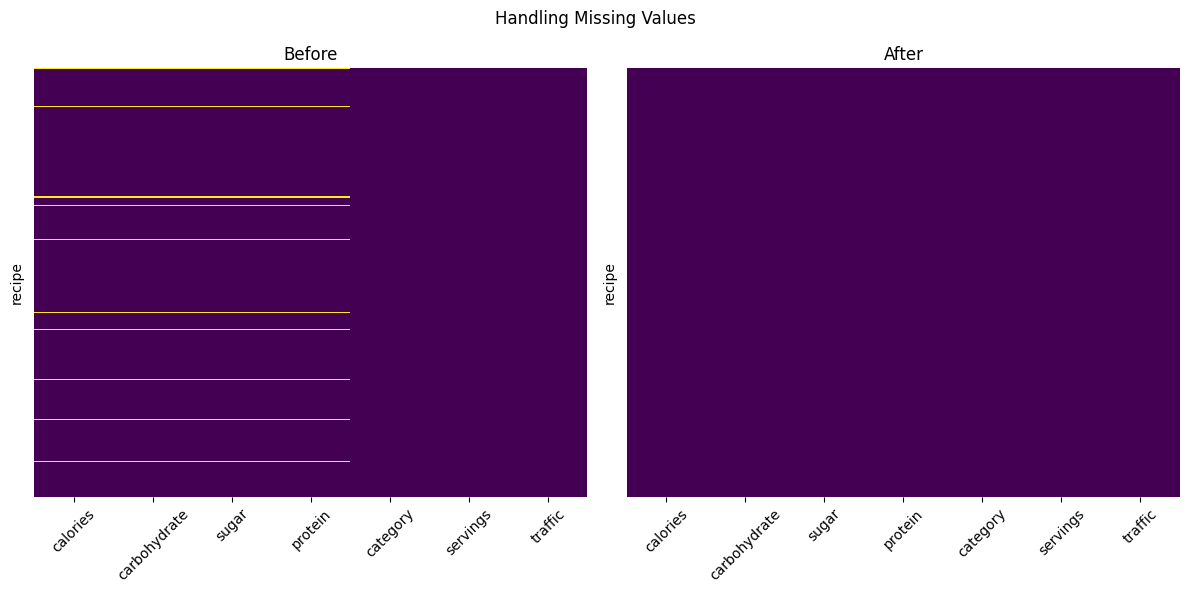

In [9]:
data_orig = data.copy()
data = data.dropna(subset = ['calories','carbohydrate','sugar','protein'])


# To check Missing Values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(data_orig.isnull(), cbar=False, yticklabels=False, cmap="viridis",ax=axes[0])
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis", ax=axes[1])
axes[0].set_title("Before")
axes[1].set_title("After")
fig.suptitle("Handling Missing Values")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()

We handled outliers using the IQR method and visualized the data distribution for numerical values. It's important to note that there are no outliers in categorical values. Outliers, which represent rare deviations from typical data points, are shown in the graph outside the box:

In [10]:
data_bef =data.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

data_num = data.select_dtypes(include = ["float64", "int64"])

for column in data_num.columns:
    handle_outlier(data, column)

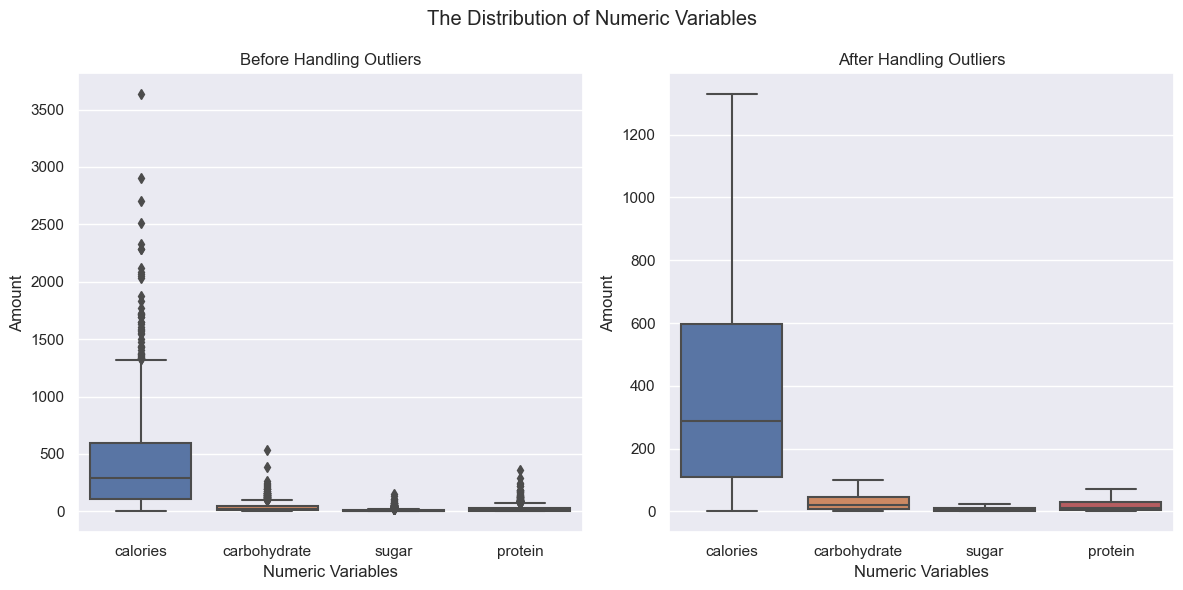

In [11]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data_bef,ax=axes[0])
sns.boxplot(data,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")
axes[0].set_ylabel("Amount")
axes[1].set_ylabel("Amount")
plt.tight_layout()
plt.show()

Outliers in our data may result from complex recipes requiring unusual ingredient amounts or larger recipe sizes. These visualizations display the distribution of numerical values before and after handling outliers. It's evident that all values exhibit a right-skewed distribution.

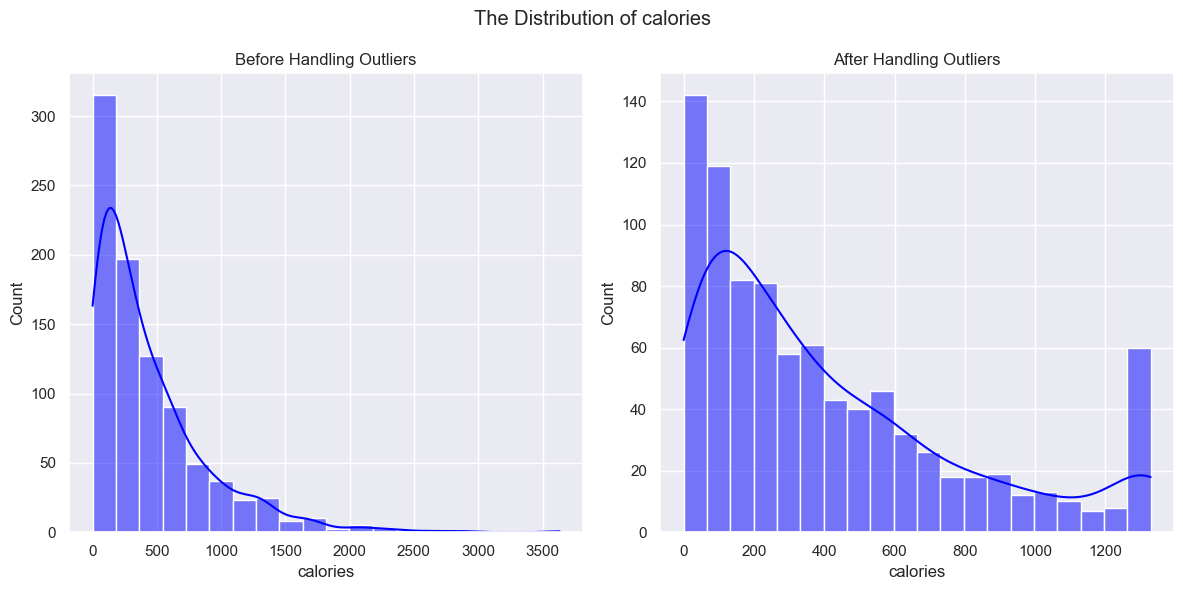

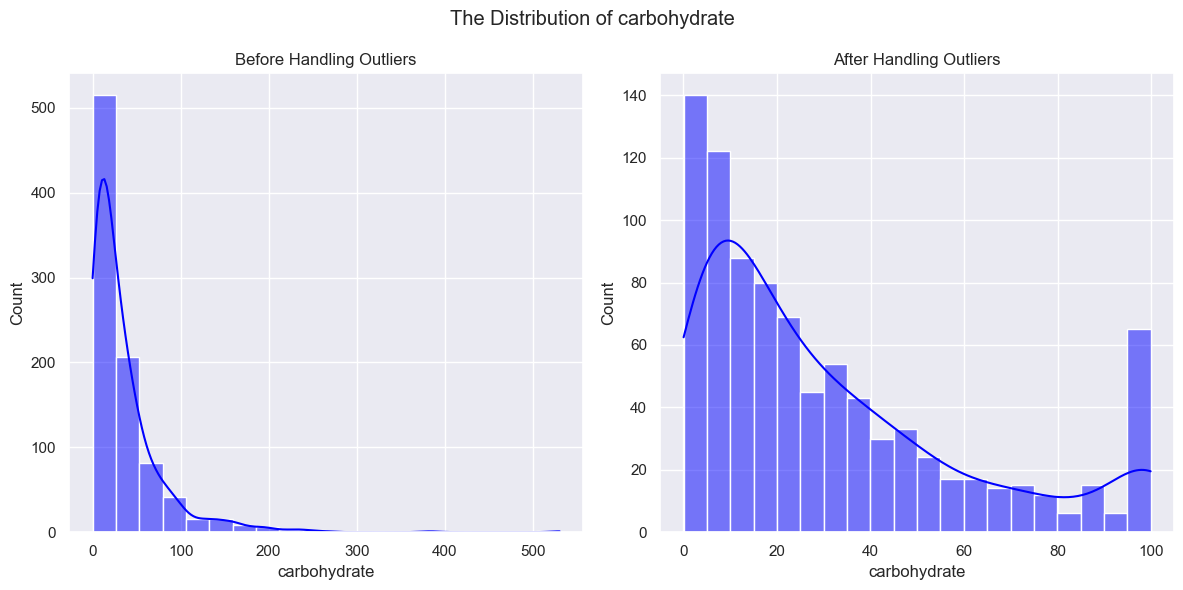

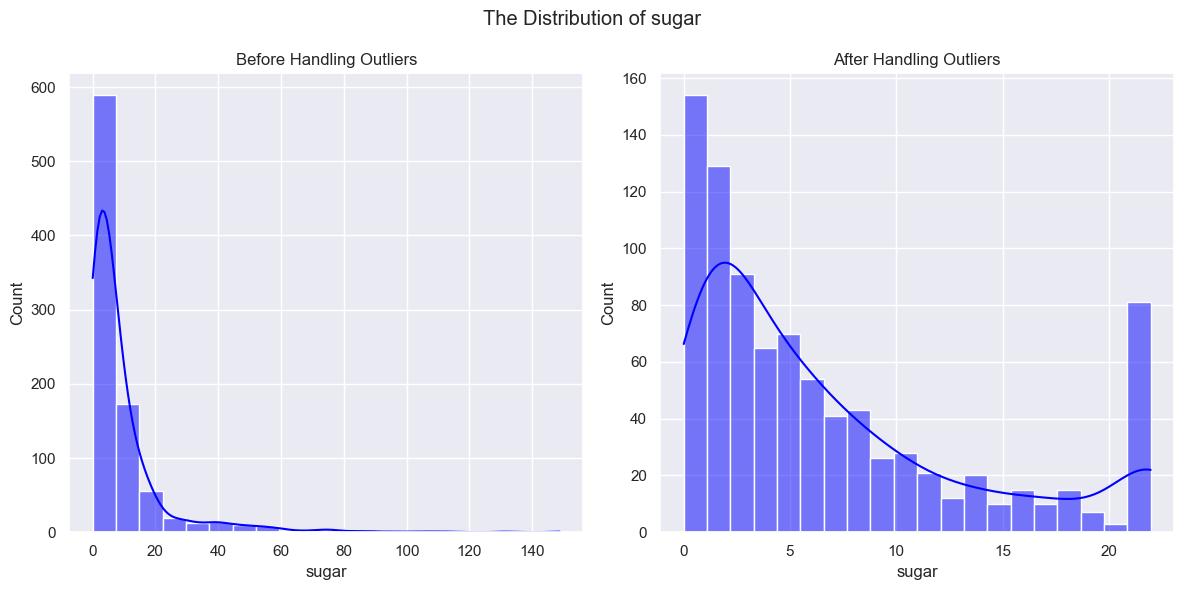

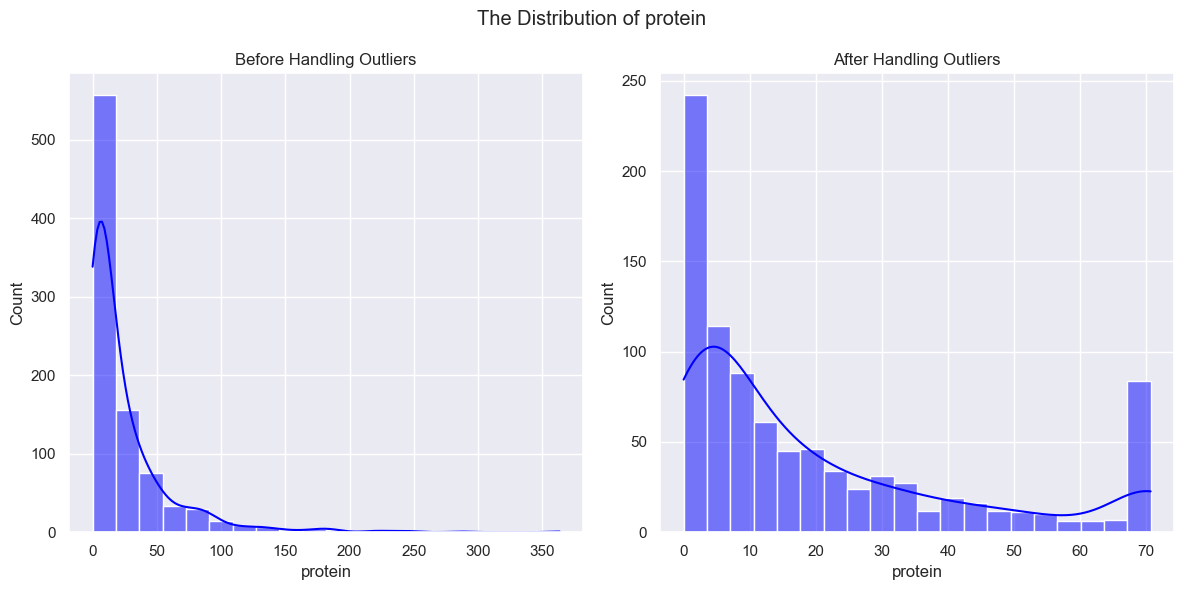

In [12]:
data_num = data.select_dtypes(include = ["float64", "int64"])
for col in data_num.columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(data_bef[col], kde=True, color='blue',ax=axes[0], bins=20)
  sns.histplot(data[col], kde=True, color='blue',ax=axes[1], bins=20)
  axes[0].set_title("Before Handling Outliers")
  axes[1].set_title("After Handling Outliers")
  fig.suptitle('The Distribution of '+col)
  plt.tight_layout()
  plt.show()

# **3. Exploratory Analysis**

This is the data after preprocessing:

In [13]:
data.head(10)

,calories,carbohydrate,sugar,protein,category,servings,traffic
recipe,,,,,,,
2,35.48,38.56,0.660,0.9200,Potato,4,High
3,914.28,42.68,3.090,2.8800,Breakfast,1,Low
4,97.03,30.56,21.965,0.0200,Beverages,4,High
5,27.05,1.85,0.800,0.5300,Beverages,4,Low
6,691.15,3.46,1.650,53.9300,One Dish Meal,2,High
7,183.94,47.95,9.750,46.7100,Chicken Breast,4,Low
8,299.14,3.17,0.400,32.4000,Lunch/Snacks,4,Low
9,538.52,3.78,3.370,3.7900,Pork,6,High
10,248.28,48.54,3.990,70.7075,Chicken,2,Low


In [14]:
print(data.dtypes)
data.shape

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings        category
traffic         category
dtype: object


(895, 7)

After processing, we now have clean data ready for exploration and analysis. The dataset contains 895 rows and 7 columns. Here are some data statistics:

In [15]:
data.describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,413.361665,31.083430,6.834866,20.124053
std,378.241095,28.945415,6.624471,22.111812
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,1328.480000,99.850000,21.965000,70.707500


## Target Variable - traffic

Since we aim to predict which recipes will attract traffic, the 'traffic' variable will be our target variable. The chart below displays the distribution of 'High' and 'Low' categories in this variable, revealing an unbalanced dataset, with 60% of the data belonging to the 'High' class and 40% to the 'Low' class.

In [16]:
value_counts = data['traffic'].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
print(percentage)

High    59.776536
Low     40.223464
Name: traffic, dtype: float64


Text(0, 0.5, 'Count')

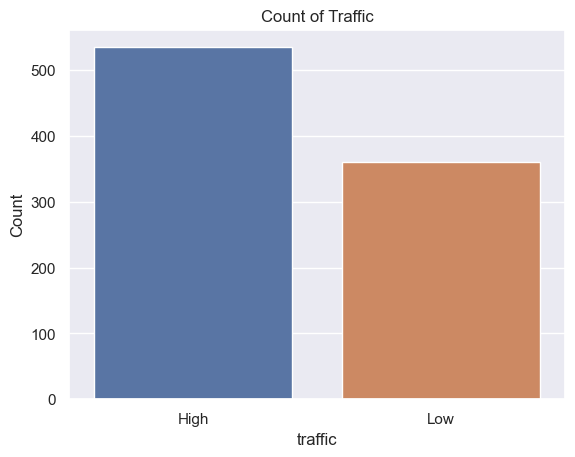

In [17]:
cou=sns.countplot(x='traffic', data=data) 
cou.set_title('Count of Traffic')
plt.ylabel('Count')

## Numeric Variables - calories, carbohydrate, sugar, protein

From the heatmap below, we can conclude that there is a positive relationship between protien and calories, a negative relationship between protien and sugar.

Text(0.5, 1.0, 'The Correlation Heatmap between Numeric Variables')

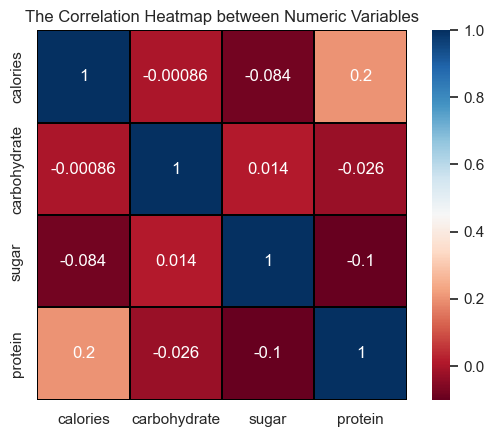

In [18]:
heat=sns.heatmap(data.corr(), annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")
heat.set_title("The Correlation Heatmap between Numeric Variables")

### Relationship between Numeric Variables & Target - calories, carbohydrate, sugar, protein & traffic

To discover the relationship between a target variable and a numerical variables, I decided to make barplot to investigate the relationship between calories, carbohydrate, sugar, protein and our target varible - traffic. From the barplots below, we can observe that the 'high' traffic category exhibits higher levels of calories, carbohydrate and protein compared to the 'low' traffic category, the opposite of the distribution plan for sugar, often because people prefer less sweet foods.

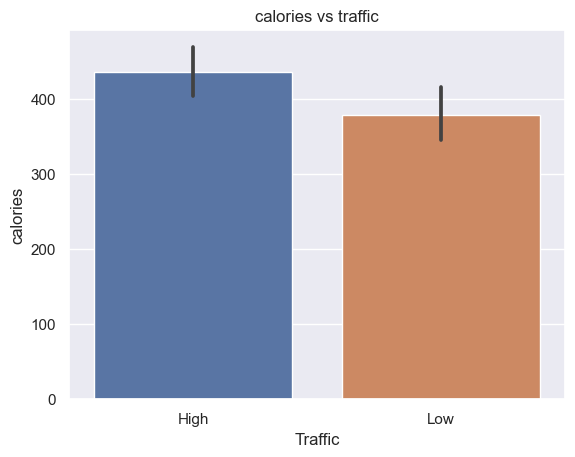

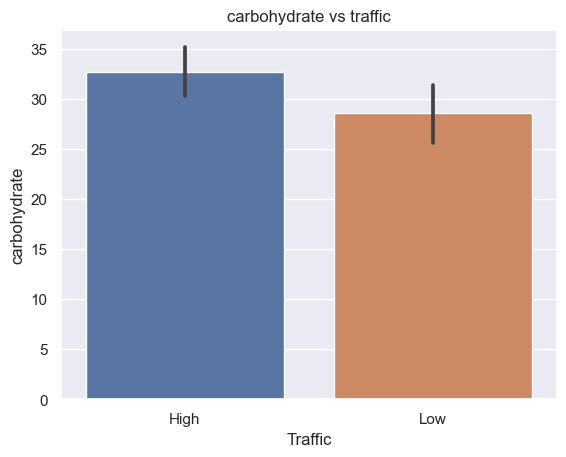

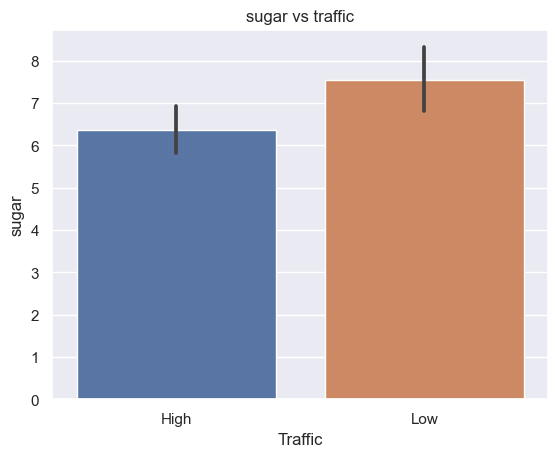

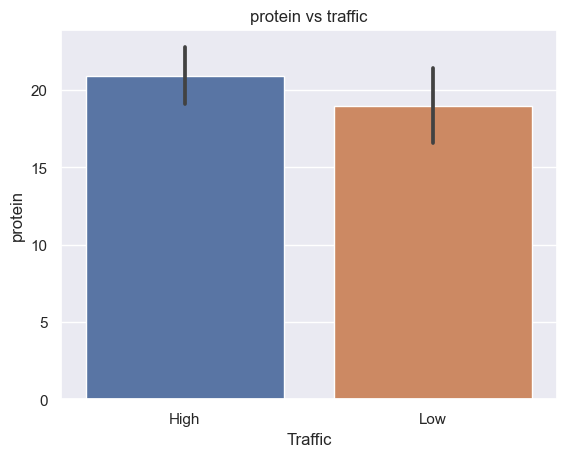

In [19]:
for col in data_num.columns:
  bar=sns.barplot(data, x="traffic", y=col)
  bar.set(xlabel="Traffic", ylabel=col, title=col+' vs traffic')
  plt.show()

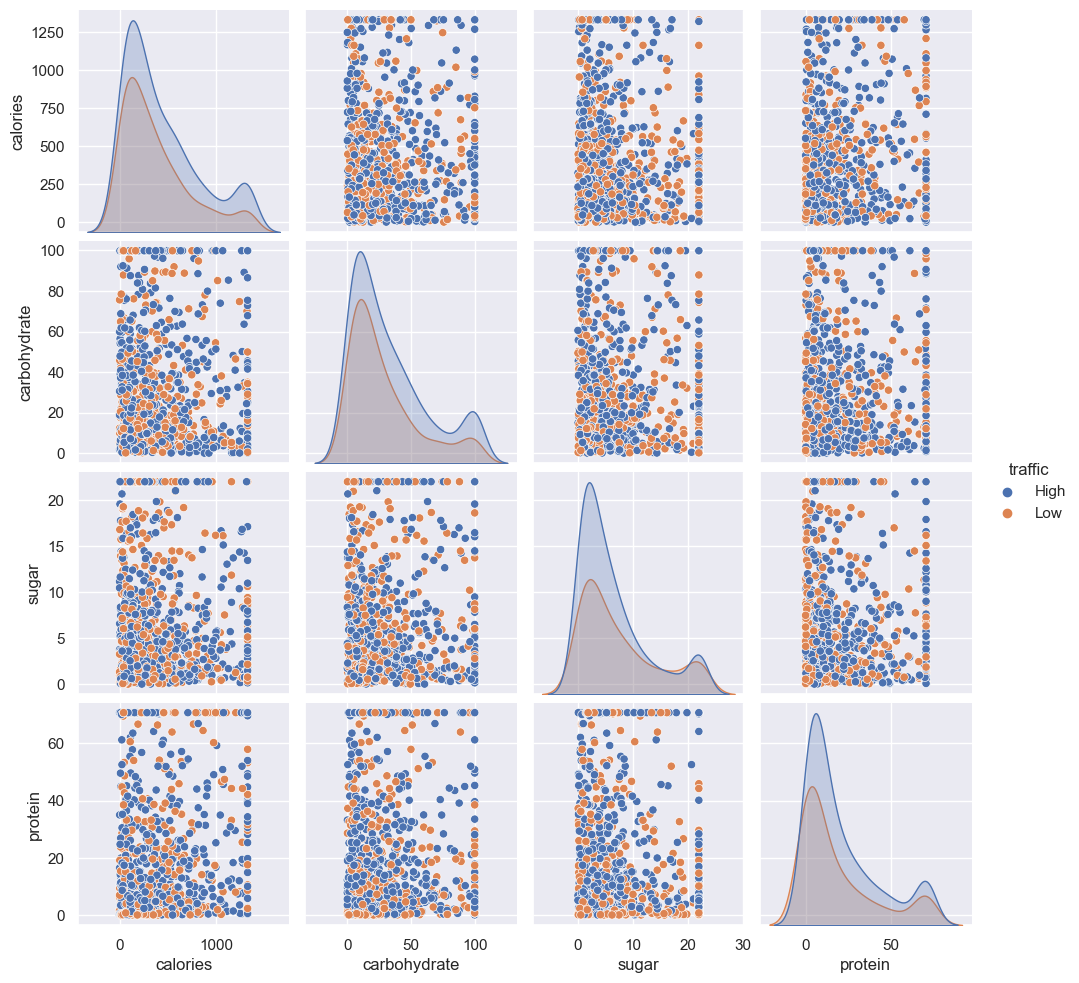

In [20]:
pair_plot = sns.pairplot(data=data, hue="traffic")
plt.show()

## Categorical Variables - category, servings

From the bar chart below, it's evident that the most common recipe category is 'Breakfast.' Also, the most common serving number is 4.

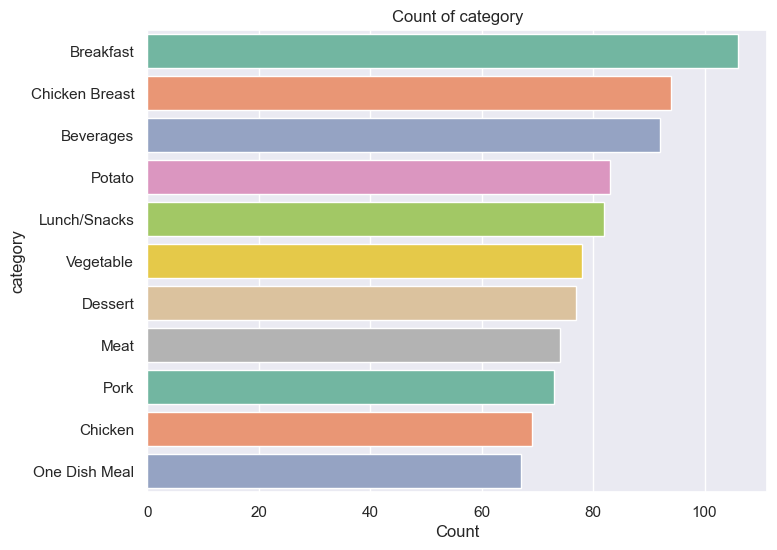

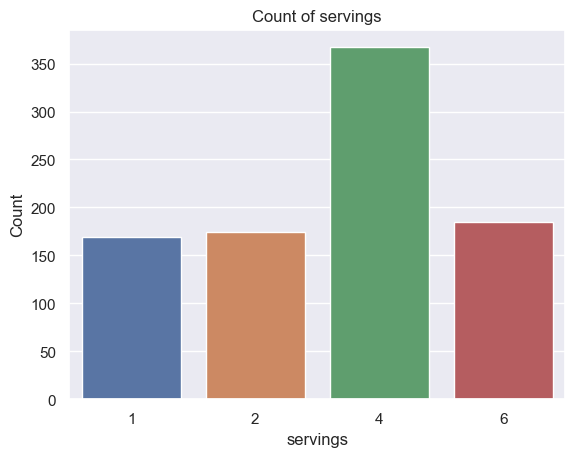

In [21]:
plt.figure(figsize=(8, 6))
cou=sns.countplot(y='category', data=data, palette="Set2",order=data['category'].value_counts().index)
cou.set_title('Count of category')
plt.xlabel('Count')
plt.show()
cou=sns.countplot(x='servings', data=data)
cou.set_title('Count of servings')
plt.ylabel('Count')
plt.show()

### Relationship between Categorical Variables & Target - category, servings & traffic

The following chart depicts the distributions between traffic, category, and the number of servings. Notably, we observe a strong relationship between the traffic variable and the category variable. In recipe categories where one is high, the other is low, and vice versa. As for the distribution between traffic and the number of servings, the 'high' class consistently stands out as the most common.

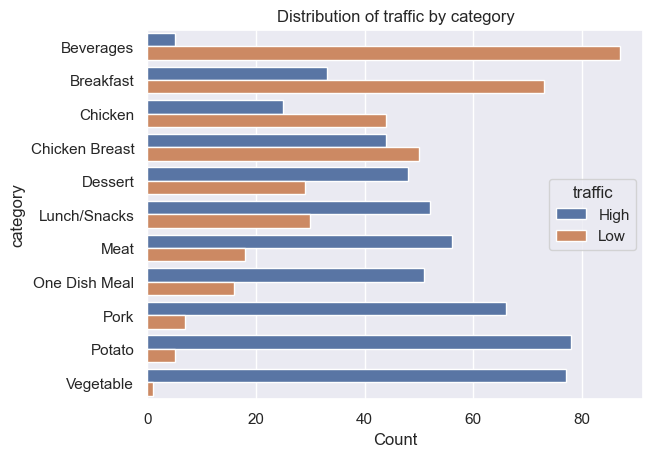

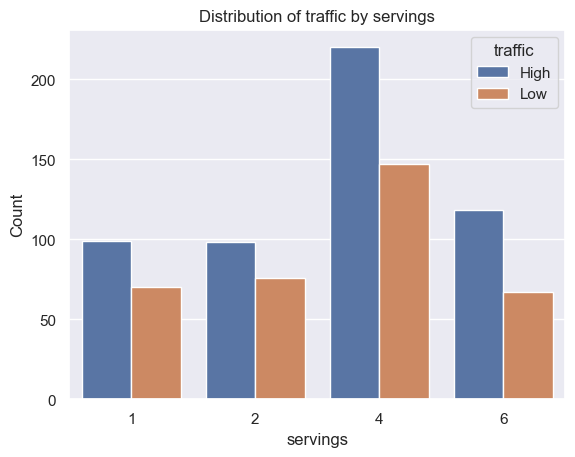

In [22]:
cou=sns.countplot(data=data, y="category", hue="traffic")
cou.set_title('Distribution of traffic by category')
plt.xlabel('Count')
plt.show()
cou=sns.countplot(x='servings', data=data, hue="traffic")
cou.set_title('Distribution of traffic by servings')
plt.ylabel('Count')
plt.show()

# **4. Model Fitting**

Predicting high traffic levels is a **binary classification problem** in machine learning. We have selected the **Logistic Regression** model as our primary choice for its simplicity and interpretability. Logistic Regression is well-suited for binary classification tasks.

Additionally, we have opted for the **Random Forest** model as a comparative approach. Random Forest is an ensemble learning algorithm that combines multiple decision trees, offering higher accuracy and robustness to overfitting compared to a single Decision Tree classifier.

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Prepare Data for Modelling

To enable modelling, I chose **calories, carbohydrate, sugar, protein, servings, category** as features, **traffic** as target variables. I also have made the following changes:


*   Encoding categorical features
*   Scaling the numeric features
*   Split the data into a training set and a test set

### Encoding categorical variables

In [24]:
data = pd.get_dummies(data, columns=['category'])

In [25]:
data['servings'] = data['servings'].astype('int')
label_encoder = LabelEncoder()
data['traffic'] = label_encoder.fit_transform(data['traffic'])

Additionally, I inserted a standard deviation (std) column among the numerical columns for improved results, and our dataset now comprises 895 rows and 18 columns.

In [26]:
columns_to_std = ['calories','carbohydrate', 'sugar', 'protein']

# Calculate standard deviation for the selected columns and add a new 'std' column
data['std'] = data[columns_to_std].apply(lambda row: np.std(row), axis=1)

In [27]:
column_order = ['calories',  'carbohydrate',   'sugar',  'protein','std' , 'servings','category_Beverages'  ,'category_Breakfast' , 'category_Chicken' ,'category_Chicken Breast',  'category_Dessert' , 'category_Lunch/Snacks' ,'category_Meat',  'category_One Dish Meal',  'category_Pork',  'category_Potato', 'category_Vegetable' ,'traffic'] 
data = data[column_order]
data.head()

,calories,carbohydrate,sugar,protein,std,servings,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,traffic
recipe,,,,,,,,,,,,,,,,,,
2,35.48,38.56,0.660,0.92,18.147933,4,0,0,0,0,0,0,0,0,0,1,0,0
3,914.28,42.68,3.090,2.88,389.210353,1,0,1,0,0,0,0,0,0,0,0,0,1
4,97.03,30.56,21.965,0.02,36.187104,4,1,0,0,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.800,0.53,11.264798,4,1,0,0,0,0,0,0,0,0,0,0,1
6,691.15,3.46,1.650,53.93,291.511236,2,0,0,0,0,0,0,0,1,0,0,0,0


### Splitting Data & Scaling the numeric features

In [28]:
# Define X variables and our target(y)
X = data.drop(["traffic"],axis=1).values
y = data["traffic"].values
print("X : ",X.shape," y : ",y.shape)

X :  (895, 17)  y :  (895,)


In [29]:
numeric_features = X[:, :5]

In [30]:
# Standardization
st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaler = st_scaler.transform(numeric_features)

In [31]:
X_scaler = np.concatenate((numeric_features_scaler, X[:, 5:]), axis=1)

We split the data into 20% test data and 80% training data.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler,
              y, test_size= 0.20, random_state=10)

In [33]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)

X_train =  (716, 17)  y_train =  (716,)
X_test  =  (179, 17)  y_test =  (179,)


# **5. Model Evaluation**

For the evaluation, I am choosing **Precision, Recall** and **F1 Score**. Precision measures the percentage of true positives among retrieved positives, recall measures the percentage of true negatives among retrieved negatives, while F1 Score is a harmonic mean of precision and recall.

## Logistic Regression

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

logistic_model = LogisticRegression(max_iter=1000, C=5)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[105  12]
 [ 22  40]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       117
           1       0.77      0.65      0.70        62

    accuracy                           0.81       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



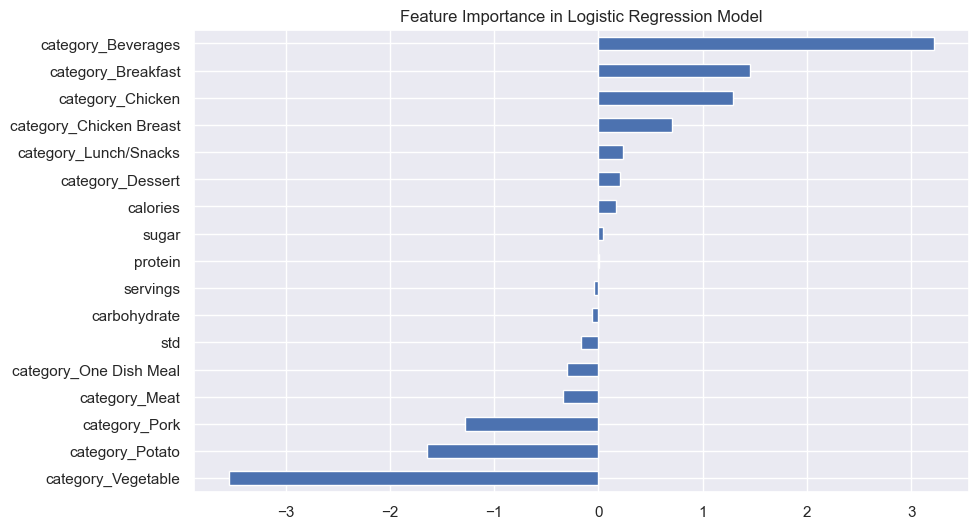

In [35]:
# Feature Importance
importances = pd.Series(logistic_model.coef_[0],index=column_order[:-1])
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

## Random Forest

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

random_forest_model = RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_split=3, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[106  11]
 [ 16  46]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       117
           1       0.81      0.74      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



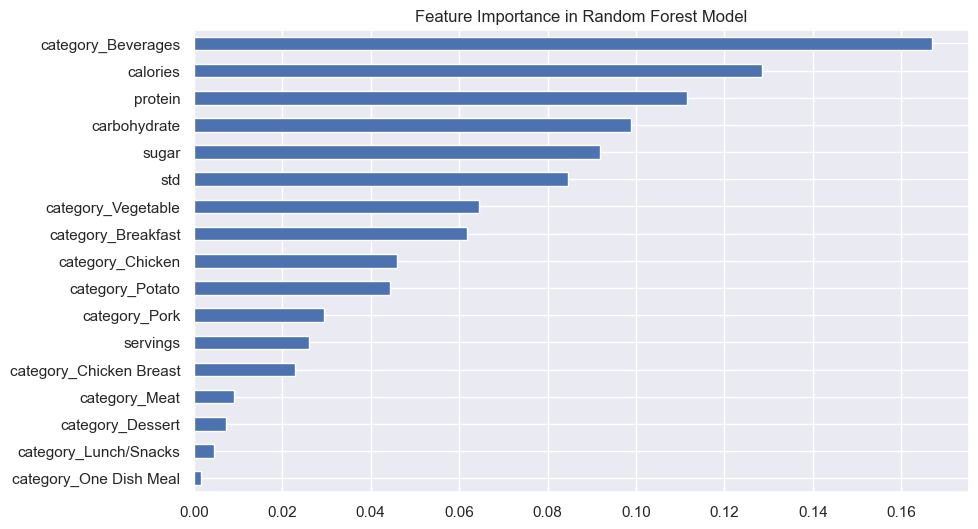

In [37]:
# Feature Importance
importances = pd.Series(random_forest_model.feature_importances_,index=column_order[:-1])
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Random Forest Model')
plt.show()

## Results

Precision, Recall and F1 Score of High traffic by the Logistic Regression model are **0.83, 0.90, 0.86**, and by Random Forest model are **0.87, 0.91, 0.89**. That means the Random Forest model fits the features better and has less error in predicting values.

# 6. **Business Focus & Metrics**

## **The business goals**

There are two business goals:

1. Predict recipes with high traffic.

2. Achieve an 80% probability of predicting 'High' traffic for recipes.

The Random Forest model has achieved both goals, because it has high rates of Precision, Recall and F1 Score are more then 80%.

## **Recommendations**

To help Product Manager predict the high traffic of the recipes, we can deploy this Random Forest Model into production. By implementing this model, about 89% of the prediction will make sure the traffic will be high. This will help Product Manager build their confidence in generating more traffic to the rest of the website.

To implement and improve the model, I will consider the following steps:
1.   **Deployment Strategy:** Explore optimal deployment strategies for the machine learning model in terms of performance and cost-effectiveness. Consider deploying it on edge devices for convenience and security, and test the model with newly hired product analysts.
2.   **Regular Model Retraining:** Implement a system for regular model retraining. As user preferences may change over time, it is essential to keep the model up-to-date with the latest data to maintain its predictive accuracy.
3.   **Collect More Data:** e.g. time to make, cost per serving, ingredients, site duration time (how long users were at the recipe page), income links (from what sites users came to the recipe page), combinations of recipes (what recipes user visited at the same session with the current recipe).
4.   **Balance Data Categories:** The dataset contains a class imbalance between low and high-traffic recipes. To address this issue, we suggest collecting additional data for the minority class (low-traffic recipes) or applying data augmentation techniques to balance the dataset. 

## KPI and the performance of 2 models using KPI

The company wants to increase an **accuracy** of prediction of high traffic. Therefore, we would consider using accuracy of predictions which predicted high traffic as a KPI to compare 2 models again. The higher the percentage, the better the model performs. The Logistic Regression model has an accuracy lower than 80%, while the **Random Forest** model achieves approximately **85%** accuracy.

In [38]:
# accuracy score on the train data
X_train_pred = logistic_model.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = logistic_model.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7513966480446927
Accuracy score of the test data:  0.8100558659217877


In [39]:
# accuracy score on the train data
X_train_pred = random_forest_model.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = random_forest_model.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.8645251396648045
Accuracy score of the test data:  0.8491620111731844


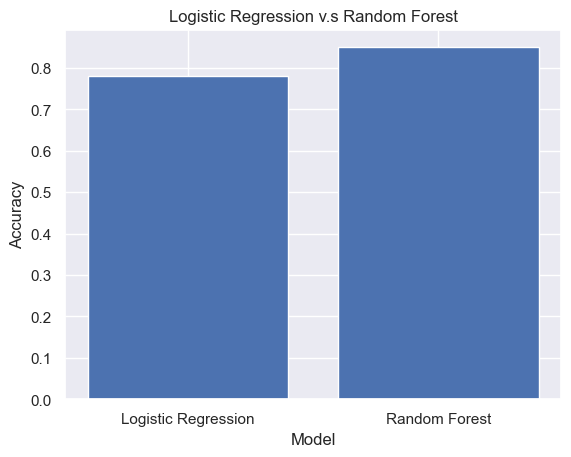

In [40]:
model1_accuracy =  0.78
model2_accuracy = 0.85

model_names = ['Logistic Regression', 'Random Forest']
x = range(len(model_names))
accuracies = [model1_accuracy, model2_accuracy]
plt.bar(x, accuracies, tick_label=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression v.s Random Forest')
plt.show()


# 7. **Conclusion**

Predicting popular recipes for the homepage is a valuable step toward achieving the company's business goals. Our machine learning models offer a data-driven approach that can significantly improve the recipe selection process. By tracking the suggested KPI and implementing our recommendations, we can expect to see positive results in terms of website traffic and subscriptions.


*Nour El Imane S.*


06/11/2023